<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_agrupamientoJerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



Mounted at /content/drive


In [4]:
wine = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/Wine_cultivars.csv')
df = wine[['Malic Acid', 'Flavanoids']]
df.head()


,Malic Acid,Flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,2.59,2.69


# Escala Datos

In [5]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)



# Visualiza Dendograma

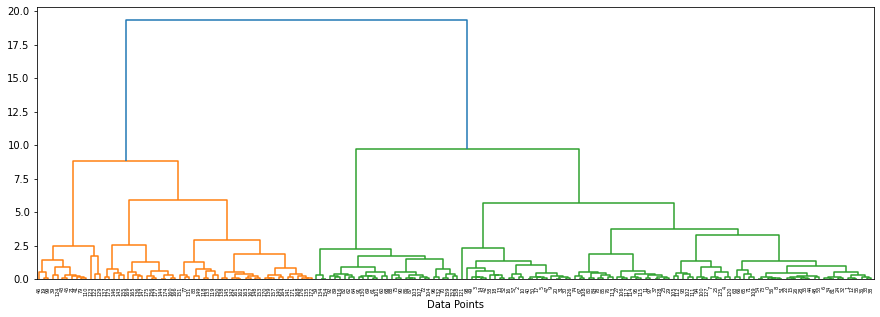

In [6]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');
